In [1]:
!pip install --quiet climetlab matplotlib

# ERA5 temperature

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import climetlab as cml

In [4]:
ds = cml.load_dataset("era5-temperature",
                   period=(1979, 1982),
                   domain="France",
                   time=12)

In [5]:
%%time
len(ds)

CPU times: user 546 ms, sys: 47.8 ms, total: 594 ms
Wall time: 747 ms


1461

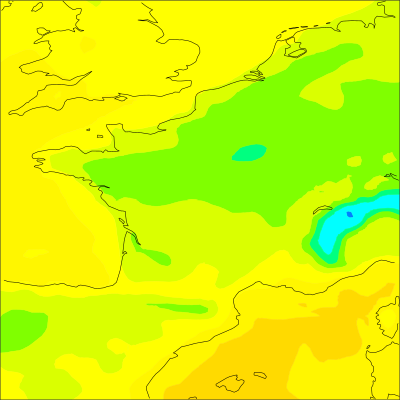

In [6]:
cml.plot_map(ds[-1], width=400)

In [7]:
%%time
ds.to_numpy().shape

CPU times: user 696 ms, sys: 61.5 ms, total: 758 ms
Wall time: 878 ms


(1461, 63, 63)

In [8]:
average = np.mean(ds.to_numpy(), axis=0)

In [9]:
average

array([[283.75848794, 283.5668571 , 283.28540925, ..., 283.07590083,
        283.10228607, 283.10129547],
       [283.4987798 , 283.60046529, 283.65712864, ..., 283.17566394,
        283.24349259, 283.31315138],
       [283.27489098, 282.96305539, 283.02593639, ..., 283.29626172,
        283.42080452, 283.51664   ],
       ...,
       [291.8236389 , 291.01727633, 290.47778203, ..., 292.8580171 ,
        292.87150182, 293.54986986],
       [292.33919705, 292.04851029, 291.94756675, ..., 292.50002974,
        292.48287807, 294.12919668],
       [292.80611291, 292.51362676, 292.36608895, ..., 292.37801758,
        292.20149706, 292.06164609]])

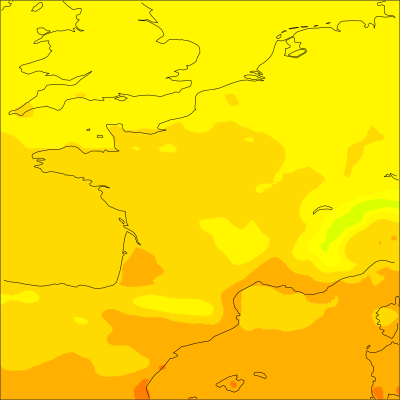

In [10]:
cml.plot_map(average, field=ds[0], width=400)

In [11]:
x = ds.to_xarray()

In [12]:
x

<xarray.Dataset>
Dimensions:     (latitude: 63, longitude: 63, time: 1461)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 1982-12-31T12:0...
    number      int64 0
    step        timedelta64[ns] 00:00:00
    surface     int64 0
  * latitude    (latitude) float64 54.5 54.25 54.0 53.75 ... 39.5 39.25 39.0
  * longitude   (longitude) float64 -6.0 -5.75 -5.5 -5.25 ... 8.75 9.0 9.25 9.5
    valid_time  (time) datetime64[ns] 1979-01-01T12:00:00 ... 1982-12-31T12:0...
Data variables:
    t2m         (time, latitude, longitude) float32 269.13837 ... 285.14648

In [13]:
point = x.t2m.isel(latitude=50, longitude=5) - 273.15

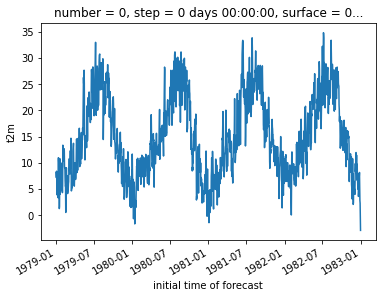

In [14]:
point.plot()

(array([6.200000e+01, 1.715000e+03, 2.437000e+04, 2.066870e+05,
        1.035682e+06, 2.078559e+06, 1.673685e+06, 6.841460e+05,
        9.120900e+04, 2.594000e+03]),
 array([247.29189, 254.00276, 260.71362, 267.4245 , 274.13538, 280.84625,
        287.55713, 294.268  , 300.97888, 307.68976, 314.40063],
       dtype=float32),
 <BarContainer object of 10 artists>)

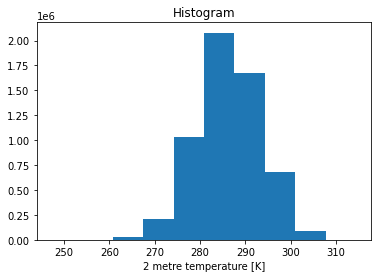

In [15]:
x.t2m.plot()

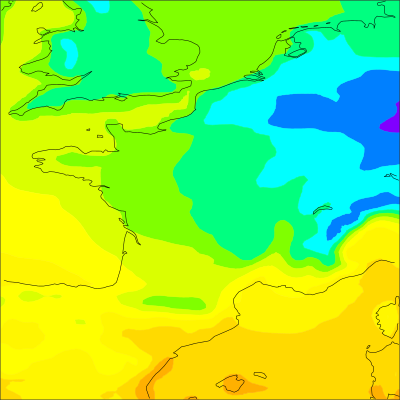

In [16]:
cml.plot_map(x, width=400)